# Mount your Google Drive


In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import necessary libraries

In [135]:
import os
from os import walk

import numpy as np

from keras.models import load_model

import PIL.Image as Image

#Build a dictionary 

1) Create a directory in which you have at least $5$ **faces**. Each face belongs to one person. Name of the directory: "**face database**".

1) Create another directory named "**test**" in which you can have other face images of the same people in "**face database**" folder.

2) Access "**face database**" directory. Read face images and create a dictionary of which each item consists of
- a key which is a name (identity) of a person in your database

- a value which is the embeddings of the face of that person

In [136]:
face_dir = '/content/drive/MyDrive/Cher Eng Lim - face database.zip (Unzipped Files)/face database'
test_dir = '/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test'

##Read images from face_dir##

In [137]:
os.chdir(face_dir)
%ls

AngelinaJolie.JPG  ElizabethOlsen.JPG  PeterDinklage.JPG
BradPitt.JPG       EmmaWatson.JPG


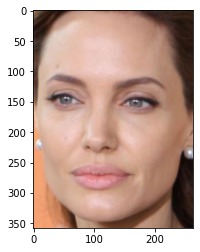

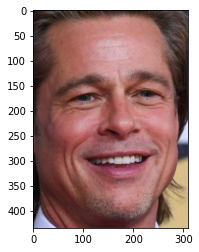

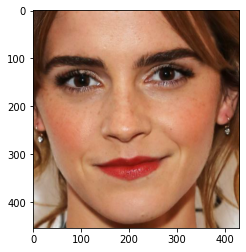

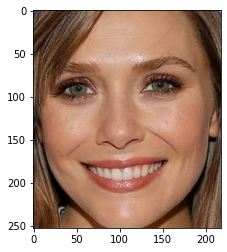

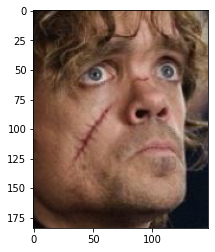

In [25]:
import glob
import matplotlib.pyplot as plt

images = [plt.imread(file) for file in glob.glob('/content/drive/MyDrive/Cher Eng Lim - face database.zip (Unzipped Files)/face database/*.JPG')] 


for i in range(len(images)):
    plt.imshow(images[i])    # the arguments of imshow are (name of image, image object)
    plt.show()

In [6]:
# load the image and convert to RGB
BradPitt = Image.open('BradPitt.JPG').convert("RGB")

# convert it to numpy array
BradPitt_np = np.asarray(BradPitt)

# print the size
print("Size of the face:", BradPitt_np.shape)

Size of the face: (435, 310, 3)


In [7]:
# load the image and convert to RGB
EmmaWatson = Image.open('EmmaWatson.JPG').convert("RGB")

# convert it to numpy array
EmmaWatson_np = np.asarray(EmmaWatson)

# print the size
print("Size of the face:", EmmaWatson_np.shape)

Size of the face: (454, 431, 3)


###Observations:###
1. Original images are of different sizes.


##Test images from test_dir##

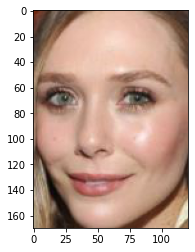

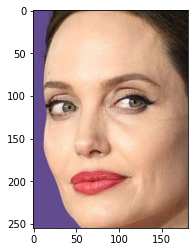

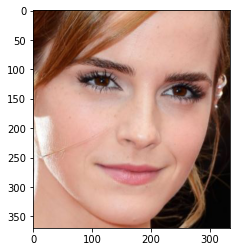

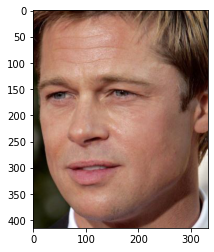

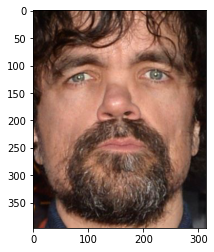

In [26]:
images = [plt.imread(file) for file in glob.glob('/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test/*.JPG')] 

for i in range(len(images)):
    plt.imshow(images[i])    # the arguments of imshow are (name of image, image object)
    plt.show()

##Copy `convert_to_embedding()` here.

In [138]:
def convert_to_embedding(face, model):

  face = face.astype('float32')
  mean, std = face.mean(), face.std()
  face = (face - mean) / std

  face_expanded = np.expand_dims(face, axis = 0)

  face_embedding = model.predict(face_expanded)

  return face_embedding

In [139]:
from keras.models import load_model

##Load FaceNet here.

In [140]:
model_dir = '/content/drive/MyDrive/L12/'
os.chdir(model_dir)

# load the model
model = load_model('Cher Eng Lim - facenet_keras.h5')

In [12]:
len(model.layers)

426

In [13]:
model.input_shape

(None, 160, 160, 3)

## Build your `face_dictionary` ("name_to_index") here.

In [141]:
face_database_path = '/content/drive/MyDrive/Cher Eng Lim - face database.zip (Unzipped Files)/face database'
(_, _, filenames) = next(os.walk(face_database_path))

os.chdir(face_database_path)

# dictionary
index_to_name = {}
required_size = (160, 160)

for i, name in zip(range(len(filenames)), filenames):
  index_to_name[i] = name
  

In [142]:
index_to_name

{0: 'AngelinaJolie.JPG',
 1: 'BradPitt.JPG',
 2: 'EmmaWatson.JPG',
 3: 'ElizabethOlsen.JPG',
 4: 'PeterDinklage.JPG'}

In [145]:
name_to_index = { name: i for i, name in index_to_name.items() }

In [146]:
name_to_index

{'AngelinaJolie.JPG': 0,
 'BradPitt.JPG': 1,
 'ElizabethOlsen.JPG': 3,
 'EmmaWatson.JPG': 2,
 'PeterDinklage.JPG': 4}

Print the keys of the dictionary. These are identities used later.

In [147]:
print(name_to_index.keys())

dict_keys(['AngelinaJolie.JPG', 'BradPitt.JPG', 'EmmaWatson.JPG', 'ElizabethOlsen.JPG', 'PeterDinklage.JPG'])


##Compute face dictionary##

In [165]:
embedding_matrix = np.empty((len(filenames), 128))

for i, name in zip(range(len(filenames)), filenames):
  
  face = Image.open(name).convert("RGB")

  face_resized = face.resize(required_size)

  face_np = np.asarray(face_resized)

  embedding_matrix[i, :] = convert_to_embedding(face_np, model)

  face_dictionary[name] = embedding_matrix[i, :]
  

In [166]:
face_dictionary

{0: array([ 8.18501949e-01,  3.96668017e-01,  3.92434627e-01,  4.26767498e-01,
        -2.28198111e-01, -2.93030649e-01,  6.74340665e-01,  6.18987501e-01,
         1.22571719e+00,  2.85934597e-01, -1.56301725e+00, -7.98833191e-01,
        -7.53408313e-01, -7.07574710e-02, -1.27117705e+00, -7.09423363e-01,
        -1.79608941e+00, -4.89921153e-01,  1.50601193e-03,  2.57982244e-03,
         1.72979403e+00, -6.75822318e-01, -4.99433726e-01, -1.18446076e+00,
        -1.42469430e+00,  4.58055973e-01, -1.05946422e+00, -6.67143106e-01,
        -3.62000823e-01,  1.00733209e+00,  9.13891196e-02,  1.84773839e+00,
         2.38205209e-01, -8.18534717e-02,  4.33416605e-01, -1.41784072e+00,
        -4.29791570e-01, -8.70945975e-02,  1.23728895e+00,  7.95898557e-01,
         6.87962532e-01,  9.49638367e-01, -8.08154345e-01, -7.96263397e-01,
        -9.44996327e-02,  1.06827009e+00, -6.81872249e-01,  1.95942748e+00,
         3.55806351e-01,  9.43390466e-03,  1.11346793e+00,  1.75141907e+00,
        -

##Compute matrix for test_dir##

In [20]:
test_database_path = '/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test'
(_, _, t_filenames) = next(os.walk(test_database_path))

os.chdir(test_database_path)

test_matrix = np.empty((len(t_filenames), 128))

for i, name in zip(range(len(t_filenames)), t_filenames):
  
  face = Image.open(name).convert("RGB")

  face_resized = face.resize(required_size)

  face_np = np.asarray(face_resized)

  test_matrix[i, :] = convert_to_embedding(face_np, model)

##Compute distance of test_dir##

In [21]:
from scipy.spatial import distance_matrix

result = distance_matrix(embedding_matrix, test_matrix)

In [22]:
print(result)

[[13.24366098  5.75275596 16.0533835  14.14728908 14.94973994]
 [14.3484408  14.90415418 15.24972822  6.66967509 14.08598748]
 [15.06417119 14.83886147  7.21900019 16.33816076 15.86584814]
 [ 5.68098731 11.73183756 15.11022918 14.38392741 17.4776498 ]
 [15.77096641 15.49520013 16.80704865 15.50079114  9.9647803 ]]


In [33]:
brad = Image.open("/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test/BradPitt_test.JPG").convert("RGB")

In [34]:
brad_resized = brad.resize(required_size)
brad_np = np.asarray(brad_resized)

In [171]:
brad_matrix = convert_to_embedding(brad_np, model)

In [37]:
brad_matrix.shape

(1, 128)

In [187]:
brad_matrix

array([[-0.29736137, -0.4749574 , -0.38598675, -0.57499385, -0.58660233,
        -1.4993777 , -0.8026707 , -1.1199231 ,  1.6317884 ,  0.01140495,
        -0.50403583, -1.1099166 ,  0.41596264, -0.7387223 ,  0.8703133 ,
         1.7446928 , -1.5420625 ,  0.15096173, -0.03175766, -0.2640624 ,
         1.9493216 ,  0.11371986,  0.07666161,  0.41692224,  1.8147045 ,
         0.9301777 , -0.10962173, -0.16163982,  1.6327128 ,  0.7078772 ,
        -0.01276665, -0.68684405,  0.6193608 ,  1.7379068 , -0.04784704,
         0.40526107, -0.40435904, -0.86367226,  0.4820483 , -1.2636461 ,
         1.239997  ,  0.6589562 , -0.657156  , -0.9284281 , -0.6797779 ,
         0.6463921 , -0.64232486, -0.7381686 , -0.52931505, -0.78809476,
         0.28304213, -0.61175966, -1.7209735 ,  1.2902758 , -0.5320594 ,
        -1.2419273 ,  0.77338004,  0.0358026 , -0.11797369,  0.35418412,
         1.2103746 , -1.1522703 ,  0.275369  , -0.3942595 ,  0.4199567 ,
        -0.94183356,  0.22366267, -1.4700005 , -0.1

In [43]:
brad_result = distance_matrix(embedding_matrix, brad_matrix)

In [175]:
identity='BradPitt'

In [182]:
f=face_dictionary[identity+'.JPG'].reshape(1,-1)

In [183]:
f.shape

(1, 128)

In [186]:
f

array([[-0.3196204 , -0.89315414,  0.09683322, -0.21977547, -0.21371514,
        -1.05682945, -1.72814679,  0.20152506,  1.36906242, -0.33021498,
        -0.17604357, -0.31670031,  0.69388396, -1.22499192,  0.75408959,
         1.56635487, -0.96099269,  0.32342112,  0.29809898,  0.55571198,
         1.90472114,  0.31146961,  0.15576166,  0.28718755,  0.43477455,
         0.09892397, -1.04365396,  0.86193389,  1.59163916,  0.0672796 ,
        -0.10726044, -1.00023127,  0.83328146,  0.57748598, -0.54016262,
         0.7051968 ,  0.27619579, -0.81651777,  0.1802289 , -0.91523468,
         1.12195587,  1.53007019, -1.10552645, -1.53915524, -0.87049925,
         1.35652161, -0.50593656, -0.68538129, -0.89137489, -0.27620003,
        -0.20659052, -0.21765004, -1.7531476 ,  1.3898958 , -0.28988236,
        -0.07709691,  0.31709239, -0.04615979, -0.62645781,  0.33676407,
         1.57719302, -0.82983339,  1.2225033 ,  0.19147396, -0.4978101 ,
        -0.2235287 ,  0.84479797, -0.59951311, -0.2

In [188]:
brad_distance = distance_matrix(f, brad_matrix)

In [189]:
brad_distance

array([[6.66967509]])

In [90]:
face_dictionary

{0: 'AngelinaJolie.JPG',
 1: 'BradPitt.JPG',
 2: 'EmmaWatson.JPG',
 3: 'ElizabethOlsen.JPG',
 4: 'PeterDinklage.JPG'}

In [89]:
brad_result

array([[14.14728908],
       [ 6.66967509],
       [16.33816076],
       [14.38392741],
       [15.50079114]])

In [55]:
brad_result.min()

6.669675091265002

In [47]:
np.argmin(brad_result)

1

In [50]:
name=face_dictionary[np.argmin(brad_result)]

In [52]:
import re

In [53]:
name = re.sub('.JPG', '', name)

In [54]:
name

'BradPitt'

In [123]:
float(brad_result[name_to_index['AngelinaJolie.JPG']])

14.147289084535407

#Write a function to do face verification

## `face_verification()`

This fucntion has the following inputs:

- `imagepath`: path to a face image of a person of your choice.

- `identity`: this is the name of the person you want to verify

- `model`: the model to extract the embeddings

- `threshold`: it is used to decide whether the face under checking is the same as the person in the database.

In [151]:
def face_verification(imagepath, identity, face_database, model, threshold = 10, required_size = (160, 160)):
  #Read user image into face
  face = Image.open(imagepath).convert("RGB")
  face_resized = face.resize(required_size)
  face_np = np.asarray(face_resized)

  #Convert user image into embedding matrix
  face_matrix = convert_to_embedding(face_np, model)

  #Compute the distances between user and embedding matrix
  face_result = distance_matrix(embedding_matrix, face_matrix)

  #Extract the min distance 
  distance = face_result.min()

  #Pick the name from face dictionary that has the min. computed distance
  name=re.sub('.JPG' , '', index_to_name[np.argmin(face_result)])

  if (distance <= threshold):
    if (name==identity):
      print("Hello " + str(identity) + "! Door is opening.")
      door_flag = True
    else:
      print("You are not " + str(identity) + "!")
      distance=float(face_result[name_to_index[str(identity)+'.JPG']])
      door_flag = False
  else:
    print("Please proceed to security counter to verify your identity.")
    door_flag = False

  return distance, door_flag
  


In [193]:
def face_verification2(imagepath, identity, face_dictionary, model, threshold = 10, required_size = (160, 160)):
  #Read user image into face
  face = Image.open(imagepath).convert("RGB")
  face_resized = face.resize(required_size)
  face_np = np.asarray(face_resized)

  #Convert user image into embedding matrix
  face_matrix = convert_to_embedding(face_np, model)

  #Compute the distances between user and embedding matrix
  f=face_dictionary[identity+'.JPG'].reshape(1,-1)
  distance = float(distance_matrix(f, face_matrix))

  if (distance <= threshold):
      print("Hello " + str(identity) + "! Door is opening.")
      door_flag = True
  else:
      print("You are not " + str(identity) + "!")
      door_flag = False

  return distance, door_flag

In [194]:
BradPitt_test_path = '/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test/BradPitt_test.JPG'

face_verification2(BradPitt_test_path, "BradPitt", face_dictionary, model, threshold = 10)

Hello BradPitt! Door is opening.


(6.669675091265002, True)

In [195]:
face_verification2(BradPitt_test_path, "AngelinaJolie", face_dictionary, model, threshold = 10)

You are not AngelinaJolie!


(14.147289084535407, False)

## Test `face_verification()`

In [152]:
BradPitt_test_path = '/content/drive/MyDrive/Cher Eng Lim - test.zip (Unzipped Files)/test/BradPitt_test.JPG'

face_verification(BradPitt_test_path, "BradPitt", face_dictionary, model, threshold = 10)

Hello BradPitt! Door is opening.


(6.669675091265002, True)

In [153]:
face_verification(BradPitt_test_path, "AngelinaJolie", face_dictionary, model, threshold = 10)

You are not AngelinaJolie!


(14.147289084535407, False)

Don't re-run the below two cells. These are results obtained by my code for your reference.

Write code a verify an image

Up to now we use face images in the face verification problem. Let's expand it a bit by:

- Load an image with a face on it.

- Extract the face part.

- Verify the extracted face.

You my want to download some images from internet and test.

Load a image and display here:

Do face verification on the image.